In [4]:
from Data.Population import *
from Data.Functionals import phi, theta
from Models import rect
from Genetic.Operators import *
import matplotlib.pyplot as plt
from time import time


In [14]:
#Etapa 00: Definições Iniciais:

xobs = np.linspace(-1000, 1000, 500)
zobs = np.zeros(len(xobs))
model = rect( -100,100,300,900,2 )
model_gz = model.Gz(xobs, zobs)
model_gz_noised = model.addnoise()
xmin, xmax = -1000.0, 1000.0
ymin, ymax = 200, 800.0
min_bounds = [xmin, ymin, 1e5]
max_bounds = [xmax, ymax, 1e10]
nfontes = 20
nind = 5
pmut = 0.1
ngera = int( 50 )
mu = 0.4
guardatheta = [ ]

[24.27715955 23.28661849 25.43274492 27.52779571 53.46751228] [165.24950766 165.99614383 145.51010064 167.19118035 164.14355906]
Geração 0
[16.62758603] [171.95009906]
Geração 1
[22.49509007] [165.83868465]
Geração 2
[23.28703375 23.10676991] [166.60449156 170.78491489]
Geração 3
[14.67102604 21.31558717] [114.26700358 164.82265452]
128.93802962155405
Geração 4
[14.00537279] [159.16203924]
Geração 5
[19.50920129] [106.73709025]
126.2462915331497
Geração 6
[20.76591072] [170.84254527]
Geração 7
[12.04100858] [128.57908617]
Geração 8
[20.71018042] [113.78728228]
Geração 9
[15.24308173] [34.55464201]
49.7977237433625
Geração 10
[ 9.42580222 14.4944594 ] [132.37996227 120.4132897 ]
Geração 11
[14.49455874] [120.53628299]
Geração 12
[13.83818769] [100.82304362]
Geração 13
[14.51393891] [117.94114542]
Geração 14
[14.32835991 14.60099525] [119.52430112 111.92166276]
Geração 15
[14.07383522 13.81922454] [68.16393242 88.70586273]
Geração 16
[17.12063153 20.96229021] [113.22730173  83.7188563 ]


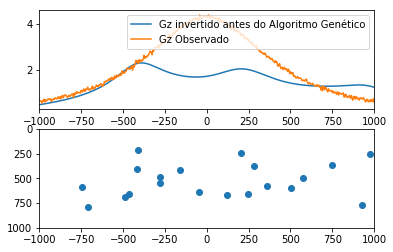

In [15]:

t1 = time( )
guardafit = [ ]
#Etapa 01: Inicialização da População:

pop = Fontes( )
pop.Gera( min_bounds, max_bounds, nfontes, nind )
fontes = pop.asArray( )
gz_fonts = pop.Gz( xobs, zobs )


#Etapa 02: Avaliação da População Inicial:
fit = phi( model_gz_noised, gz_fonts, 'L2', fontes , mu)

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]
melhor = fit[ np.argmin( fit ) ]

plt.figure( )

plt.subplot(211)
plt.plot( xobs, gz_fonts[iwinner] ,label = 'Gz invertido antes do Algoritmo Genético')
plt.plot( xobs, model_gz_noised , label = 'Gz Observado')
plt.legend( )

plt.xlim(-1000,1000)
plt.subplot(212)
plt.scatter( best[:,0], best[:,1] )
plt.xlim( -1000, 1000)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

plt.savefig('Geracao_0.png')
c = 0

for i in range( ngera ):

    c += 1
    print(f'Geração {i}')
    # Etapa 03: Selecao dos pais (roleta viciada)

    pais = operator( 'Roleta', np.array( fit ) )


    # Etapa 04: Definicao da subpopulacao para o cruzamento:

    popcruz = [ ]

    for pai in pais:
        popcruz.append( fontes[ pai ] )


    # Etapa 05: Cruzamento para criacao dos filhos:
    filhos = operator( 'Cruzamento', popcruz )


    # Etapa 06: Aplicacao de mutacao em alguns individuos da populacao de filhos:

    filhos = operator( 'Mutacao', filhos, pmut, min_bounds, max_bounds )
    gz_fonts = pop.Gz( xobs, zobs, pop.Gera_from_Existing( filhos ) )


    # Etapa 07: Calculo das aptidoes dos filhos:

    fit_filhos = phi( model_gz_noised, gz_fonts, 'L2', filhos, mu )
    
    
    # Etapa 08: Elitismo para colocar os filhos na populacao original:
    fontes, fit = operator( 'Elitismo', fontes, fit, filhos, fit_filhos )
    
    novotheta = theta( 'L2', fontes )

    guardafit.append( fit[ np.argmin( fit ) ] )
    guardatheta.append( novotheta[ np.argmin( fit ) ] )
    
    if fit[ np.argmin( fit ) ] < melhor:
        c = 0
        print( fit[np.argmin( fit ) ] )
        melhor = fit[ np.argmin( fit ) ]

    if c >= 10000:
        break



In [18]:
print( f'Melhor: { fit[ np.argmin( fit ) ] }' )
print( f'Tempo Total { time() - t1 }' )
# Etapa 09: convergencia:

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]

b = pop.Gera_from_Existing([best])
print( best )
gz_best = 0
for b in b:
    for i in b:
        gz_best += i.Gz( xobs, zobs)


Melhor: 49.12343659258071
Tempo Total 238.32576513290405
[[ 5.78400350e+01  5.60994902e+02  6.83374684e+09]
 [-6.86841059e+01  5.19096019e+02  6.83374684e+09]
 [-3.88492632e+01  3.45999151e+02  6.83374684e+09]
 [ 3.17547843e+01  5.18246908e+02  6.83374684e+09]
 [ 1.09997985e+02  3.26904021e+02  6.83374684e+09]
 [ 8.36501956e+00  4.91921714e+02  6.83374684e+09]
 [ 2.30654778e+01  3.21386613e+02  6.83374684e+09]
 [-9.51669600e-01  5.55254604e+02  6.83374684e+09]
 [ 1.56113595e+02  4.58923598e+02  6.83374684e+09]
 [ 1.08023075e+02  3.20618483e+02  6.83374684e+09]
 [-7.61155430e+01  5.81451123e+02  6.83374684e+09]
 [-8.08480879e+01  4.00314724e+02  6.83374684e+09]
 [-5.11066289e+00  3.86669456e+02  6.83374684e+09]
 [-5.69871834e+00  3.39883083e+02  6.83374684e+09]
 [-9.90747568e+01  3.22069607e+02  6.83374684e+09]
 [-7.94604625e+00  4.49950326e+02  6.83374684e+09]
 [-7.28876077e+01  4.95382951e+02  6.83374684e+09]
 [-4.58048750e+01  4.12369597e+02  6.83374684e+09]
 [ 1.71231044e+02  3.4825

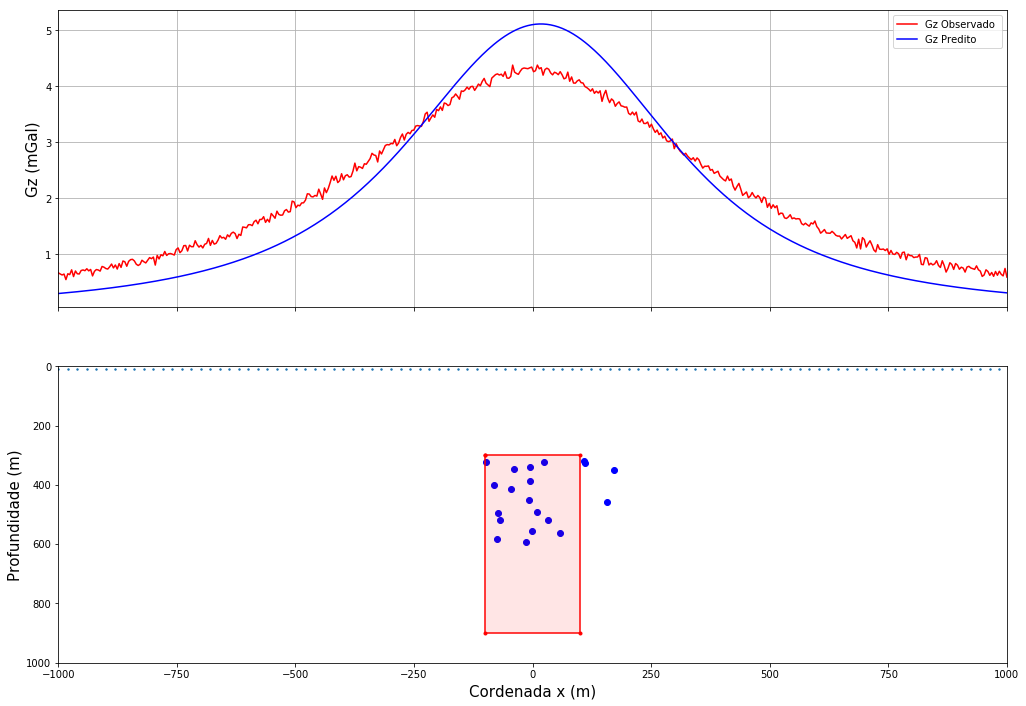

In [19]:
figure, (ax1,ax2) = plt.subplots( nrows = 2, ncols = 1,figsize=(17,12), facecolor='w', sharex = True , squeeze= True)

ax1.plot( xobs, model_gz_noised , 'r-', label = 'Gz Observado ')
ax1.plot( xobs, gz_best ,  'b-', label = 'Gz Predito ')
ax1.legend( )
ax1.set_ylabel('Gz (mGal)', fontsize = 15)
ax1.set_xlim(-1000,1000)
ax1.grid( )


ax2.scatter( best[:,0], best[:,1],color = 'blue' )
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
             [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r")

plt.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                         [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], facecolor = 'red', alpha = 0.1)

ax2.scatter( xobs[0:-1:5], zobs[0:-1:5]+10, s = 2)
ax2.set_ylabel('Profundidade (m)', fontsize = 15)
ax2.set_ylim(0,1000)
ax2.set_xlabel( 'Cordenada x (m)', fontsize = 15)
ax2.invert_yaxis()


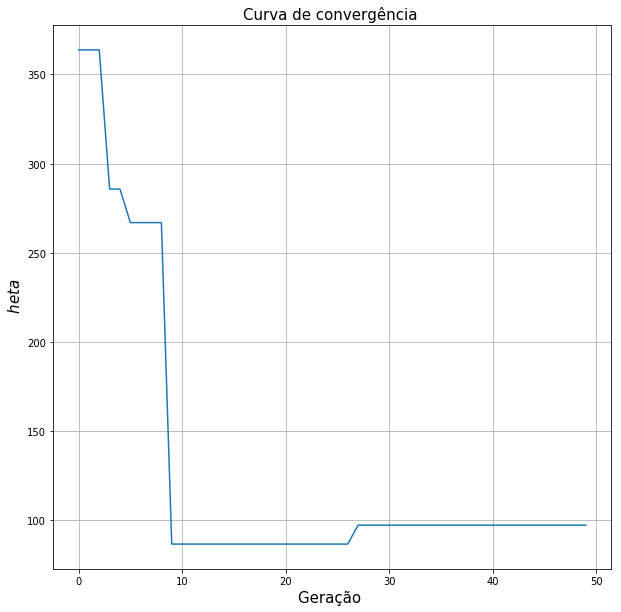

In [22]:
plt.figure( figsize=(10,10), facecolor='w')
plt.title( 'Curva de convergência ', fontsize = 15)
plt.plot( range( ngera ), guardatheta)
plt.xlabel('Geração ', fontsize = 15)
plt.ylabel( r' $\theta$ ', fontsize = 15)
plt.grid()
plt.show()